In [1]:
%matplotlib inline

In [56]:
import numpy as np
import scipy.sparse as sp
from pyamg.gallery import poisson
from pyamg.relaxation.relaxation import sor
save = 1

In [57]:
grid = (10,10)
A = poisson(grid)
h = 1.0 / (grid[0]+1)
omega = 2.0 / (1.0 + np.sin(np.pi*h))

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation

def update_plot(frame_num, surf, x_true, b, x):
    if frame_num > 0:
        sor(A, x, b, omega=omega, sweep="symmetric")
    error = np.abs(x_true - x)
    print(np.linalg.norm(error))
    E = np.reshape(error, grid)
      
    surf[0].remove()
    surf[0] = ax.plot_surface(X, Y, E, cmap=cm.coolwarm)
    ax.set_zlim(0, 0.8)
        
    return surf

5.698008734567758


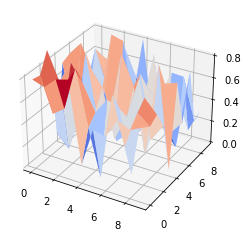

In [63]:
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(projection='3d')
    
X = np.arange(0, grid[0])
Y = np.arange(0, grid[1])
X, Y = np.meshgrid(X, Y)

x_true = np.ones(A.shape[0],)
b = A.dot(x_true)
x = np.random.rand(A.shape[0],)
error = np.abs(x_true - x)
E = np.reshape(error, grid) 
surf = [ax.plot_surface(X, Y, E, cmap=cm.coolwarm)]

anim = FuncAnimation(fig, update_plot, 15, fargs=(surf, x_true, b, x), interval=1000)

In [64]:
if save:
    anim.save('sor.mp4', writer='ffmpeg', fps=1, dpi=100)

5.698008734567758
5.698008734567758
3.584231747331774
2.657270069655308
2.0020108625002524
1.5415361744642373
1.1839502598108453
0.9158510134659801
0.7066081808051424
0.5468155613521987
0.42248470323794374
0.32688268372066726
0.25269357278992793
0.1954772171395715
0.1511465245913436
0.11690977301227555


In [65]:
HTML(anim.to_html5_video())

0.11690977301227555
0.11690977301227555
0.09040643504907055
0.06992371994046523
0.05407490610186296
0.04182214350416256
0.03234364207213972
0.025014495418524862
0.019345509137649285
0.014961632711383658
0.01157098593575781
0.008948847708821915
0.006920859219816627
0.005352487884212713
0.0041395141833962795
0.00320143358439761
